# <center><span style="color:green">INTRODUCTION TO IMBALANCED DATASET AND ANALYSIS</span></center>

### You are working on your dataset. You create a classification model and immediately get 90% accuracy. Isn't this result really great? We go a little further and discover that almost all of the data belongs to a class. How can we say this? Imbalanced data can hurt our heads in this case.
### I can predict the facial expression that occurs when you discover the imbalance.
### This dataset is an example of the situation of an imbalanced dataset and the annoying results it can cause.
### In this notebook, we will explore techniques that we can use to achieve excellent but truly excellent results in our dataset containing imbalanced data. In particular we will consider:
-  What does imbalanced data mean?
-  What is the paradox of truth?
-  What are the various approaches to the processing of imbalanced data?

##  <span style="color:red">==> Import libraries</span>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,log_loss,precision_score,recall_score,auc
from sklearn.utils import resample
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


### <span style="color:red">==> Loading Dataset</span>

In [2]:
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's look at the number of rows and columns of the data set and column names

In [3]:
print(data.shape)
data.columns

(284807, 31)


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### What do summary statistics look like?

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Do you have NaN values?

In [5]:
data.isnull().sum().sum()

0

#### Good news. We don't have null values. At least we won't deal with it.
#### Okeey. Now let's look at the correlations first. We will do this with heatmap.

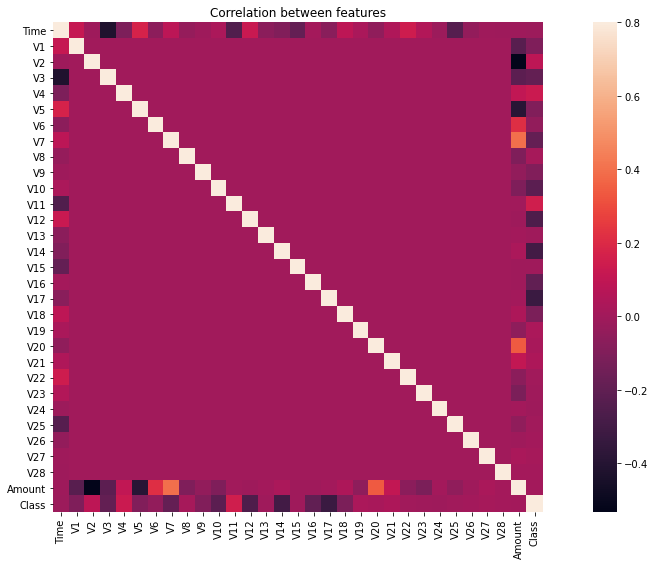

In [6]:
plt.figure(figsize=(18,9))
sns.heatmap(data.corr(),vmax = .8, square = True)
plt.title("Correlation between features")
plt.show()

#### After that, we have to look at the distribution of our class and evaluate. We need to see if there is an imbalanced distribution or not. If there is an imbalanced distribution, we need to put more emphasis on this situation. Which is very important. Let's check and draw our way. So just accuracy is very dangerously misleading.

0    284315
1       492
Name: Class, dtype: int64


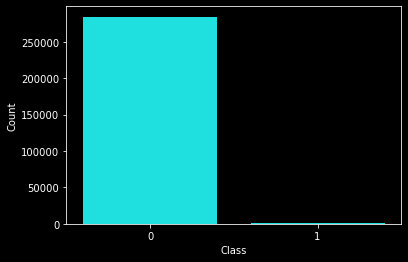

In [7]:
print(data["Class"].value_counts())
plt.style.use('dark_background')
sns.countplot("Class",data=data,color="cyan")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### I hear what you're saying. This is <span style="color:blue">IMBALANCED CLASS.</span> What is Imbalanced Classification? Let's explain
#### Classification modeling involves assigning a class tag to a sample. For example, binary classification. They take the values ​​0 or 1. There are also classification labels such as Yes / No. We always set them to 0-1. Imbalanced classification problems are uneven distribution of samples.Class distribution is so unstable that for every value in the minority class there may be hundreds or even thousands of sample differences in the majority class. Considering this data set, there are 284315 for 0 and only 492 for 1.
#### Imbalanced classification problem occurs everywhere. For example:
- Fraud Detection.
- Claim Prediction
- Churn Prediction.
- Spam Detection.
- Anomaly Detection.
- Outlier Detection.
- Intrusion Detection
- Conversion Prediction.
#### https://machinelearningmastery.com/imbalanced-classification-with-python/
#### For such distributions, the machine learning algorithms used for classification pose a challenge for predictive modeling, as they are designed around an equal number of sample assumptions for each class.
#### Since the majority class is more important in these models, the minority class is more sensitive to error. This results in models with low predictive performance, especially for the minority class.When we examine the models in more depth and find 90% accuracy, we realize that the truth is not so. 
### So what are we gonna do? Do you have a solution? Let me relax you. Come on down.

#### First of all, I want to look at the distribution of Amount and Time variables and scale them. By scaling, we take the data into a smaller range and evaluate it.

Text(0.5, 1.0, 'Distribution of Transaction Time')

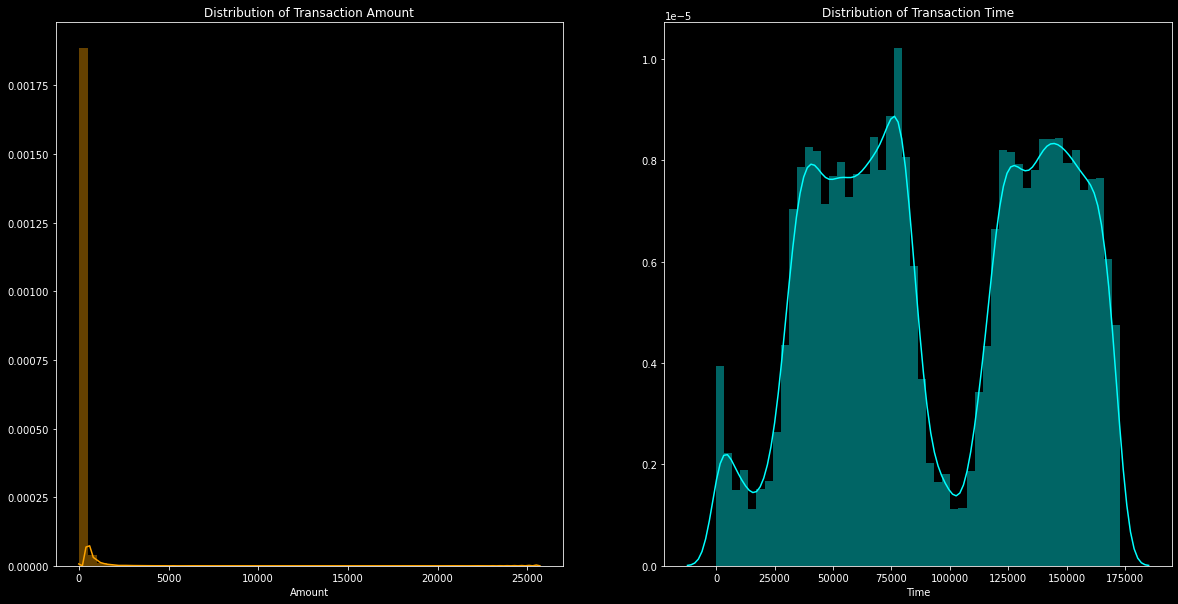

In [8]:
# Let's look at the Amount and Time distributions
fig, ax = plt.subplots(1, 2, figsize=(20,10))
sns.distplot(data["Amount"],ax=ax[0],color="orange")
sns.distplot(data["Time"],ax=ax[1],color="cyan")
ax[0].set_title("Distribution of Transaction Amount")
ax[1].set_title("Distribution of Transaction Time")

####  This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). Where the goal is to scale properties using statistics that are resistant to outliers. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results. So we will use Robustscaler

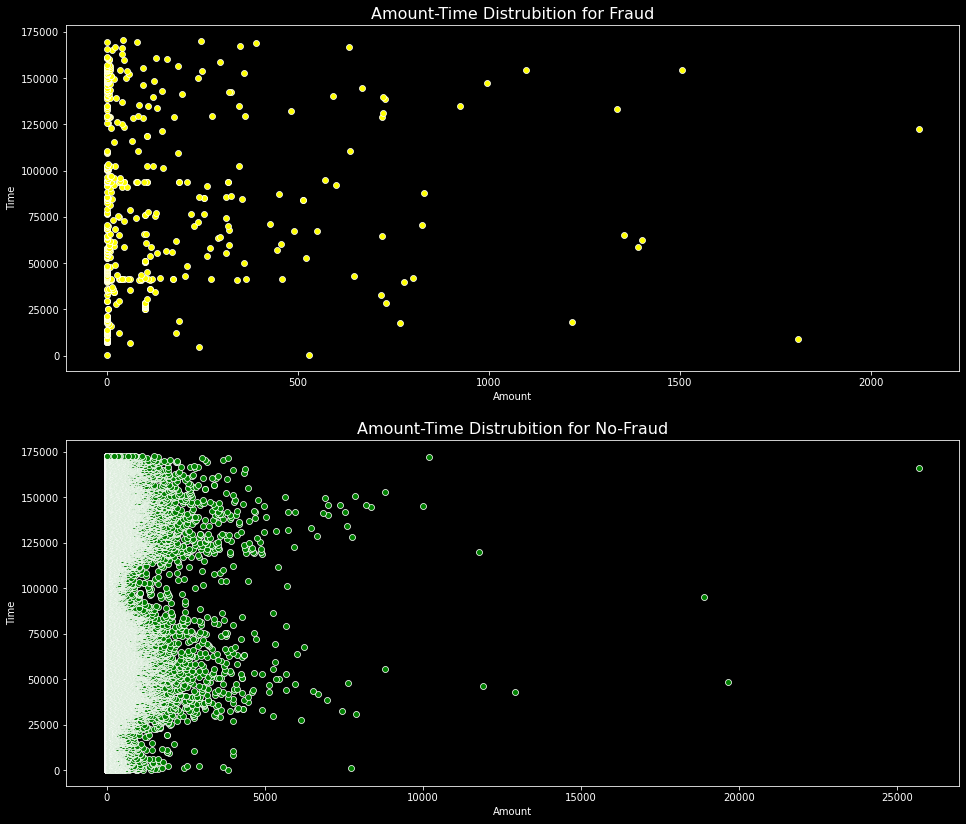

In [9]:
fraud = data.loc[data['Class'] == 1]
no_fraud = data.loc[data['Class'] == 0]
fig, ax = plt.subplots(2, 1, figsize=(16,14))
sns.scatterplot(fraud["Amount"],fraud["Time"],ax=ax[0],color="yellow")
ax[0].set_title("Amount-Time Distrubition for Fraud",fontsize=16)
sns.scatterplot(no_fraud["Amount"],no_fraud["Time"],ax=ax[1],color="green")
ax[1].set_title("Amount-Time Distrubition for No-Fraud", fontsize=16)
plt.show()

## <span style="color:red">Techniques for Imbalanced Classes:</span>
- Selecting performance metrics, such as those that focus on the minority class.
- Selecting data preparation methods, such as those that attempt to re-balance the classes (Upsampling & Downsampling)
  
- Selecting classification algorithms, such as those that penalize misclassification errors differently.
- Synthetic Minority Oversampling Technique (SMOTE).

We will prefer using SMOTE and Random Down-Sampling

#### https://machinelearningmastery.com/imbalanced-classification-with-python/
First let's explain these terms
#### Wow, incredible accuracy. Okay, you shouldn't say it's enough for me. Never say that you will use this model, this accuracy is very misleading. I heard why he said misleading. Accuracy is never enough to evaluate a model. So when we look at the Precision, Recall and F1 scores of the fraud situation from the Confusion Matrix table, we will see that the model output is actually insufficient.

#### First, let's explain the following terms:
* True Positive (TP) – You predicted positive and it’s true.You predicted that a woman is pregnant and she actually is.
* True Negative (TN) – You predicted negative and it’s true.You predicted that a man is not pregnant and he actually is not.
* False Positive (FP)(Type 1 Error) – You predicted positive and it’s false.You predicted that a man is pregnant but he actually is not.
* False Negative (FN)(Type 2 Error) – You predicted negative and it’s false.You predicted that a woman is not pregnant but she actually is.

#### <span style="color:green">What is Confusion Matrix </span>Well, it is a performance measurement for machine learning classification problem where output can be two or more classes. It is a table with 4 different combinations of predicted and actual values.
![](https://miro.medium.com/max/924/1*7EYylA6XlXSGBCF77j_rOA.png)
https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#### <span style="color:green">Precision:</span> Precision is the number of True Positives divided by the number of True Positives and False Positives. Put another way; it is the number of positive predictions divided by the total number of positive class values predicted. It is also called the Positive Predictive Value (PPV). Precision can be thought of as a measure of a classifier's exactness. A low precision can also indicate a large number of False Positives.

#### <span style="color:green">Recall:</span> Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives. Put another way it is the number of positive predictions divided by the number of positive class values in the test data. It is also called Sensitivity or the True Positive Rate.Recall can be thought of as a measure of a classifier's completeness. A low recall indicates many False Negatives.It is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.
Let’s understand TP, FP, FN, TN in terms of pregnancy analogy.


#### <span style="color:green">F1-Score</span> is the 2*((precision x recall)/(precision+recall)).Put another way, the F1 score conveys the balance between the precision and the recall.
#### <span style="color:green">ROC Curve:</span>AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In fact it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means model has no class separation capacity whatsoever.

#### <span style="color:green">Precision-Recall Curve:</span>As shown before when one has imbalanced classes, precision and recall are better metrics than accuracy, in the same way, for imbalanced classes a Precision-Recall curve is more suitable than a ROC curve.A Precision-Recall curve is a plot of the Precision (y-axis) and the Recall (x-axis) for different thresholds, much like the ROC curve. Note that in computing precision and recall there is never a use of the true negatives, these measures only consider correct predictions. Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).


#### In order to observe much better, before applying some of these techniques, let's create a model in its unbalanced form and look at its results.
#### Let's continue our way by separating our data as train-test. Thus, we can make more accurate decisions.


### <span style="color:green">Logistic Regression on Imbalanced Dataset</span>

In [10]:
#confusion matrix
def conf_matrix(actual, predicted):
    plt.figure(figsize=(14,8))
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['true_negative', 'true_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':26}, cmap='Blues');
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)

    cm_results = {"accuracy":accuracy, "precision":precision, "recall":recall, "f1":f1}
    return cm_results


#ROC Curve
def plot_roc_curve(model,X,y):
    plt.figure(figsize=(14,8))
    y_pred_prob = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--',color="red")
    plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc_score(y,y_pred_prob))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()  
    
    
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
def plot_pre_recall(model,X,y):
    probs=model.predict_proba(X)[:,1]
    precision, recall, thresholds = precision_recall_curve(y, probs)
    auc_score = auc(recall, precision) 
    plt.figure(figsize=(16,8))
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve')
    plt.show()
    print('AUC: %.3f' % auc_score)
    

### <span style="color:green">ROC Curve vs. Precision-Recall Curve with imbalenced data:</span>

In [11]:
eps=0.001
data['Amount'] = np.log(data.pop('Amount')+eps)
X=data.drop("Class",1)
y=data["Class"]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import RobustScaler
rbst=RobustScaler()
X_train=rbst.fit_transform(X_train)
X_test=rbst.transform(X_test)

Accuracy score of Logistic Regression on Imbalanced Data: 0.9992743700478681
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



{'accuracy': 0.9992743700478681,
 'precision': 0.87,
 'recall': 0.6397058823529411,
 'f1': 0.7372881355932203}

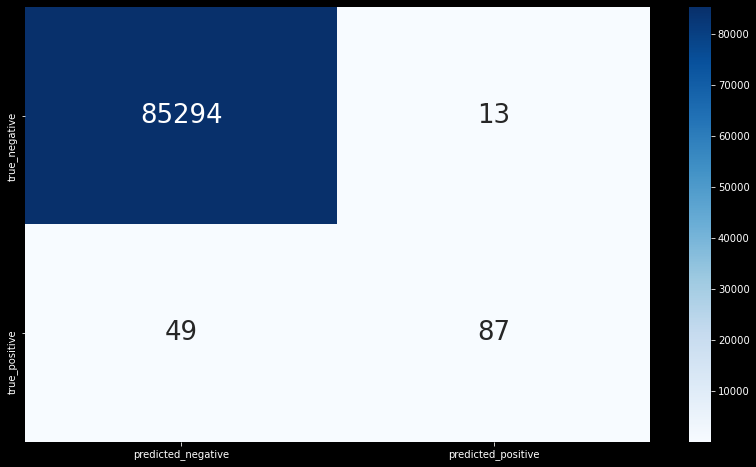

In [12]:
logreg = LogisticRegression().fit(X_train, y_train)
log_pred = logreg.predict(X_test)
print("Accuracy score of Logistic Regression on Imbalanced Data:",accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))
conf_matrix(y_test,log_pred)

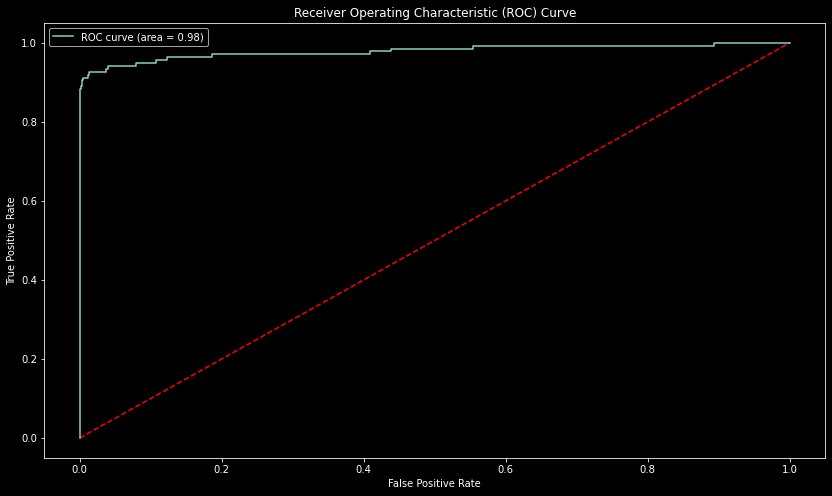

In [13]:
plot_roc_curve(logreg,X_test,y_test)

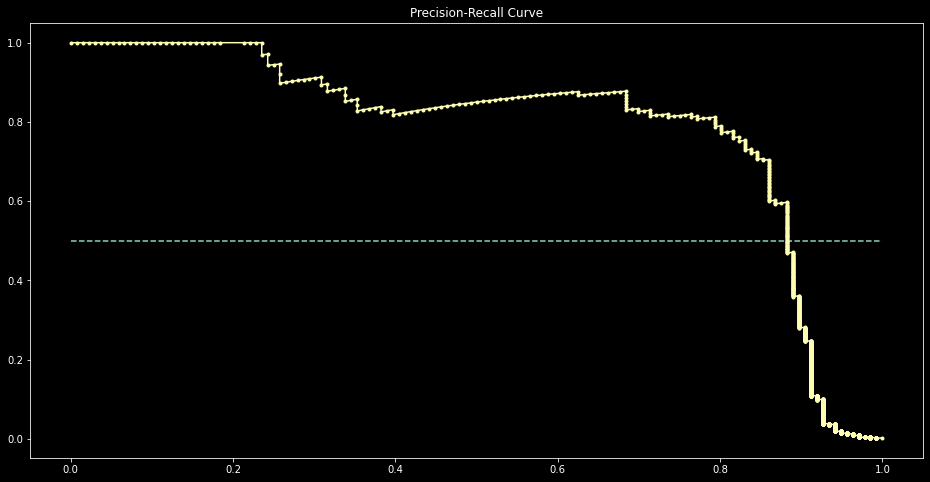

AUC: 0.789


In [14]:
plot_pre_recall(logreg,X_test,y_test)

> ### <span style="color:red">Important Note:</span> If you have an imbalanced dataset accuracy can give you false assumptions regarding the classifier’s performance, it’s better to rely on precision and recall, in the same way a Precision-Recall curve is better to calibrate the probability threshold in an imbalanced class scenario as a ROC curve.
> ### ROC Curves: summarise the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.
> ### Precision-Recall curves: summarise the trade-off between the true positive rate and the positive predictive value for a predictive model using different probability thresholds.
> ### ROC curves are appropriate when the observations are balanced between each class, whereas precision-recall curves are appropriate for imbalanced datasets. In both cases the area under the curve (AUC) can be used as a summary of the model performance.
> ### ROC curves present an optimistic picture of the model on datasets with a class imbalance.
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

> ### <i>As we have seen here, the auc score is quite small compared to accuracy (78.9%). The roc-auc score seems to be more successful, but it would not be correct to use the roc-auc score in unstable classes. We will deal with the precision-recall curve and comment on the auc score.</i>


### <span style="color:green">Decision Tree Classifier on Imbalanced Dataset</span>

### Current tactic use tree-based algorithms. Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.
> ### I'll show you random forests last. You will find that we get very effective results for the unbalanced data set. Stay curious ..

Accuracy score of Decision Tree Classifier on Imbalanced Data: 0.9992275552122467
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.73      0.81      0.77       136

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



{'accuracy': 0.9992275552122467,
 'precision': 0.7333333333333333,
 'recall': 0.8088235294117647,
 'f1': 0.7692307692307693}

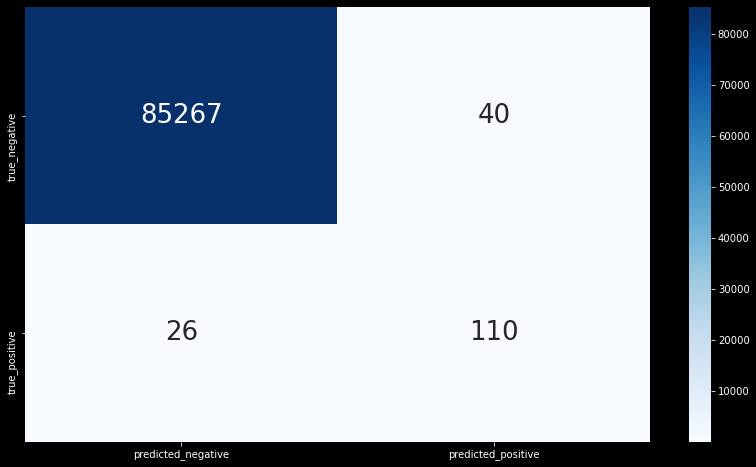

In [15]:
dectree=DecisionTreeClassifier().fit(X_train,y_train)
dec_pred=dectree.predict(X_test)
print("Accuracy score of Decision Tree Classifier on Imbalanced Data:",accuracy_score(y_test,dec_pred))
print(classification_report(y_test,dec_pred))
conf_matrix(y_test,dec_pred)


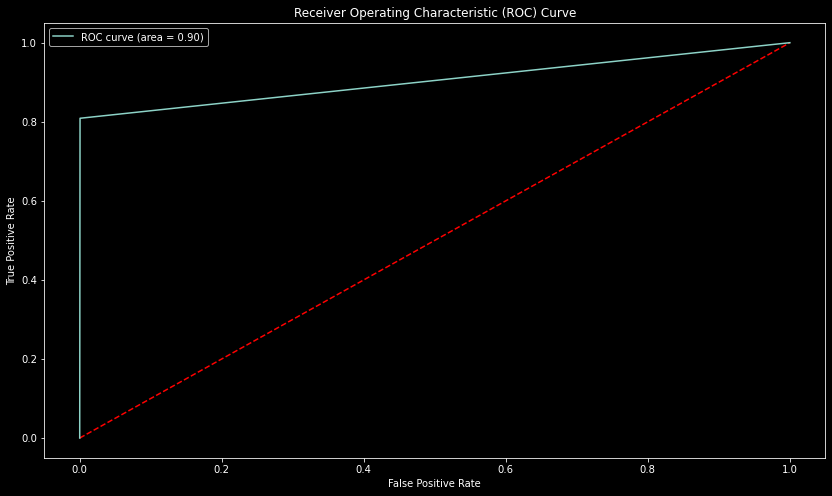

In [16]:
plot_roc_curve(dectree,X=X_test,y=y_test)

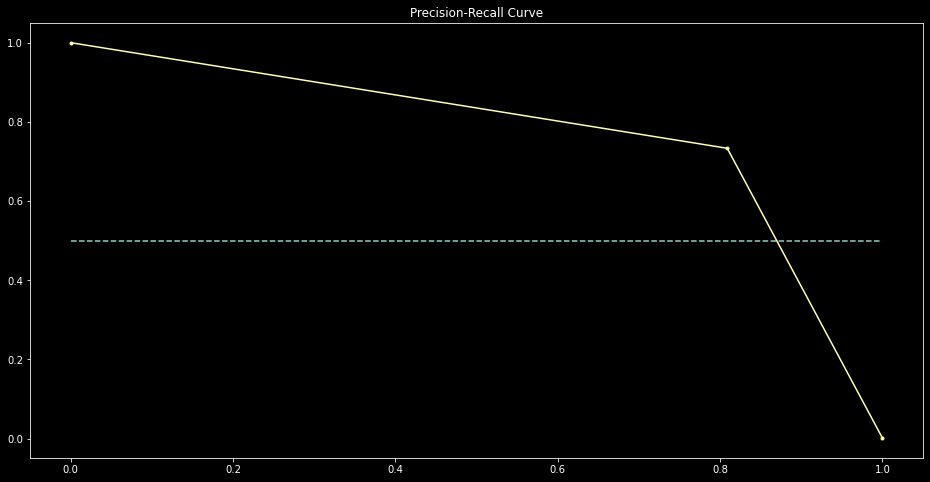

AUC: 0.771


In [17]:
plot_pre_recall(dectree,X_test,y_test)

### Logistic regression gave a better result than decision tree classifier, but still not an adequate score compared to the auc score.We need to deal with this data set until auc makes the problem acceptable.

#### As it is seen, while the accuracy is 99%, our other important metrics f1-score, precision, recall and roc-auc score did not give a consistent result for this accuracy. This is the "ACCURACY PARADOX" that is meant to be explained in full. Along with accuracy, these metrics should have been consistent.Decision tree classifiers gave better results than logistic regression, but attention should be paid to the inconsistency of other metrics with accuracy.
Let's look at two techniques that are methods of dealing with this. SMOTE, Down-Sampling and penalized model

###  <span style="color:red">Technical 1:  Random Down-Sampling:</span>
#### Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.The most common heuristic for doing so is resampling without replacement.

Here are the steps:
* First, we'll separate observations from each class into different DataFrames.
* Next, we'll resample the majority class without replacement, setting the number of samples to match that of the minority class.
* Finally, we'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

### <span style="color:red">Technical 2: Synthetic Minority Over-sampling Technique (SMOTE):</span>
#### SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

> ### SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b.

## <span style="color:green">DOWN-SAMPLING TECHNIQUE </span>

### <span style="color:green">Application of DOWN-SAMPLING technique with Logistic Regression</span>

In [18]:
data_majority = data[data.Class==0]
data_minority = data[data.Class==1]
 
# Upsample minority class
data_major_downsampled = resample(data_majority, 
                                 replace=True, 
                                 n_samples=data_minority.shape[0], 
                                 random_state=123)

data_downsampled = pd.concat([data_major_downsampled, data_minority])
 
# Display new class counts
data_downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

### This time, the new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1.

Accuracy score of Logistic Regression on Down-Sampling Data: 0.9391891891891891
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       147
           1       0.99      0.89      0.94       149

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296



{'accuracy': 0.9391891891891891,
 'precision': 0.9924812030075187,
 'recall': 0.8859060402684564,
 'f1': 0.9361702127659575}

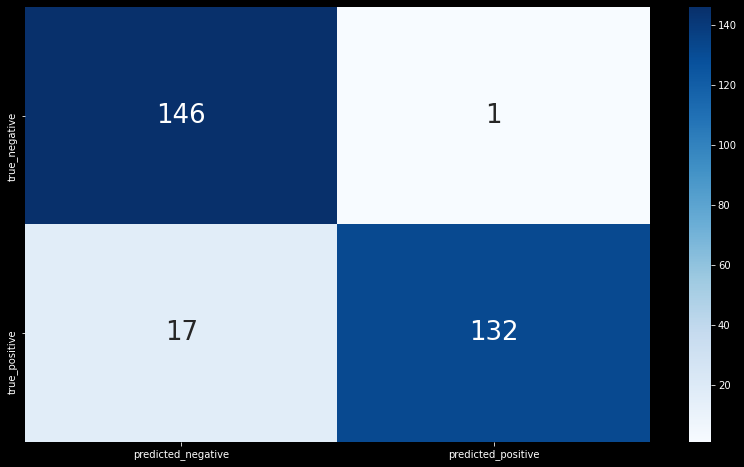

In [19]:
y_down = data_downsampled.Class
X_down = data_downsampled.drop('Class', axis=1)
X_train_down,X_test_down,y_train_down,y_test_down=train_test_split(X_down,y_down,test_size=0.3,random_state=0)
X_train_down=rbst.fit_transform(X_train_down)
X_test_down=rbst.transform(X_test_down)
logreg_down = LogisticRegression().fit(X_train_down, y_train_down)
log_pred_down = logreg_down.predict(X_test_down)

print("Accuracy score of Logistic Regression on Down-Sampling Data:", accuracy_score(y_test_down, log_pred_down) )
print(classification_report(y_test_down,log_pred_down))
conf_matrix(y_test_down, log_pred_down)

### New scores after applying the SMOTE technique seem satisfactory. Let's look at the roc_curve and precision_recall chart

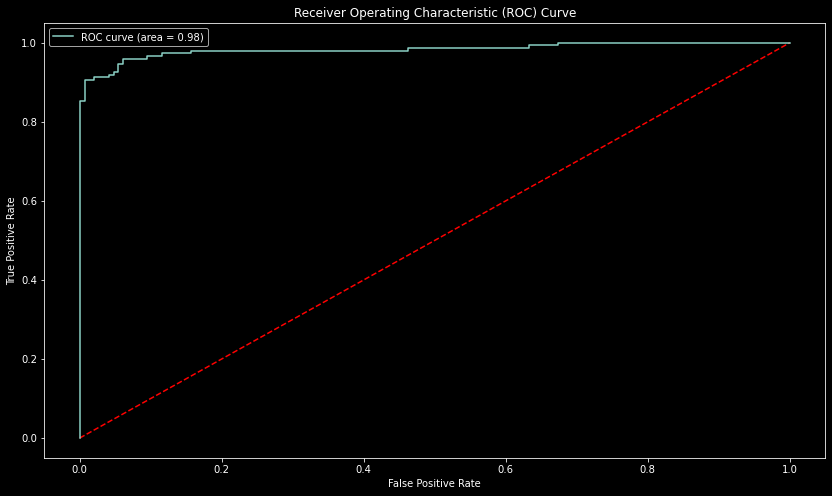

In [20]:
plot_roc_curve(logreg_down,X_test_down,y_test_down)

### The reason I show the Roc-curve graph is its relation to the precision-recall curve. Note that the precision-recall curve shows better results in unbalanced data sets. Don't let the Roc-curve mislead you.

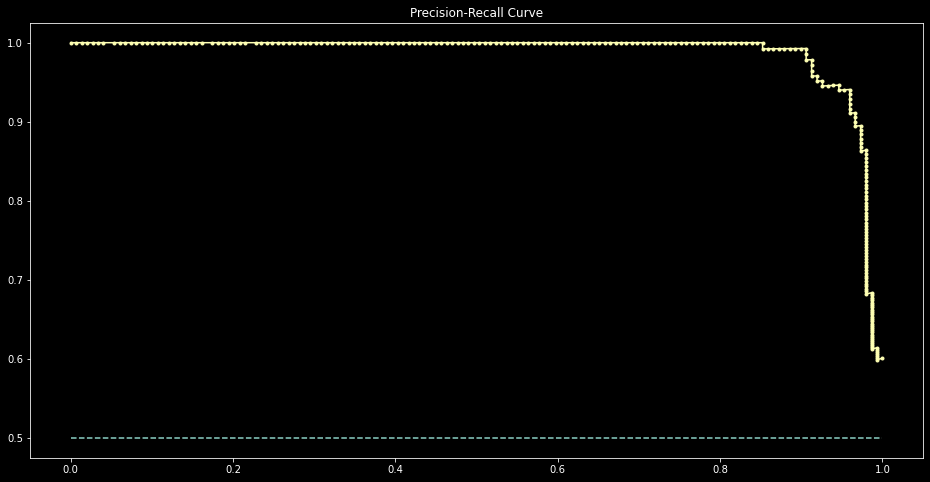

AUC: 0.987


In [21]:
plot_pre_recall(logreg_down,X_test_down,y_test_down)

### We got much better results after downsampling. Along with accuracy, recall, precision, f1-score and auc score performed much better than the model's unstable data analysis.

## <span style="color:green">Application of DOWN-SAMPLING technique with Decision Tree Classifier</span>

Accuracy score of Decision Tree Classifier on DOWN-SAMPLING Data: 0.9155405405405406
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       147
           1       0.94      0.89      0.91       149

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296

roc auc score of Decision Tree Classifier: 0.9157421357804868


{'accuracy': 0.9155405405405406,
 'precision': 0.9428571428571428,
 'recall': 0.8859060402684564,
 'f1': 0.9134948096885813}

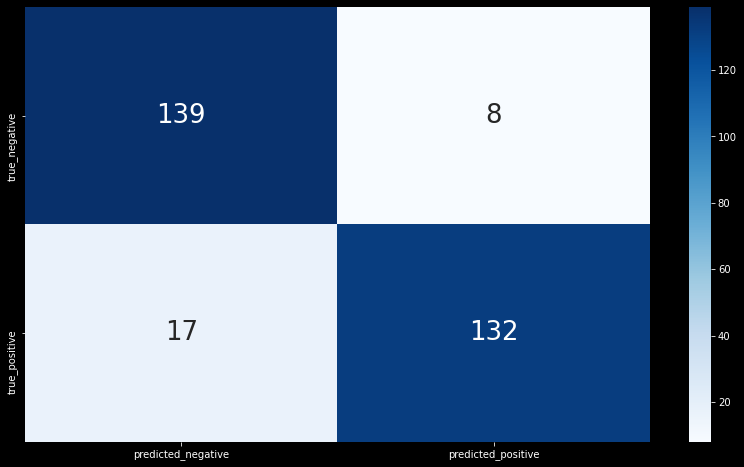

In [22]:
dectree_down=DecisionTreeClassifier()
dectree_down.fit(X_train_down, y_train_down)
dec_pred_down=dectree_down.predict(X_test_down)
print("Accuracy score of Decision Tree Classifier on DOWN-SAMPLING Data:",accuracy_score(y_test_down,dec_pred_down))
print(classification_report(y_test_down,dec_pred_down))
print("roc auc score of Decision Tree Classifier:",roc_auc_score(y_test_down,dec_pred_down))
conf_matrix(y_test_down,dec_pred_down)


#### Looking at the results, we can see the success of this technique. With the Decision Tree Classifier, we got much better results than Logistic Regression. We see that there are very close scores. Let's look at the roc-curve and precision_recall_curve chart and interpret the result

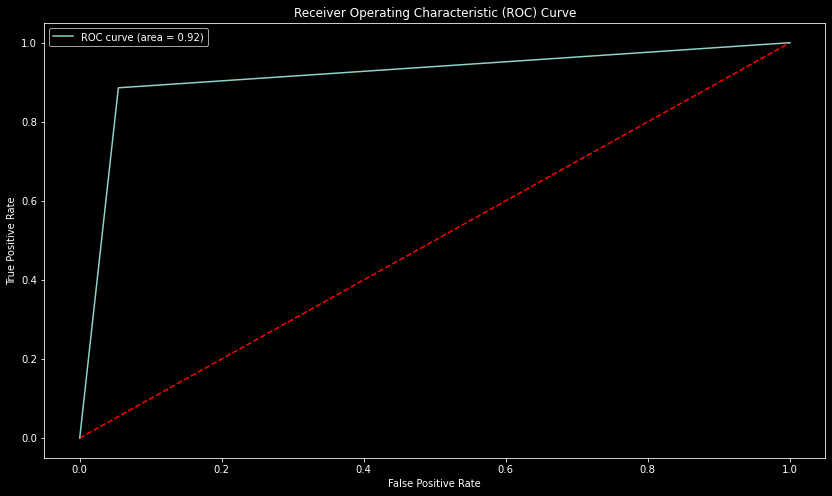

In [23]:
plot_roc_curve(dectree_down,X_test_down,y_test_down)

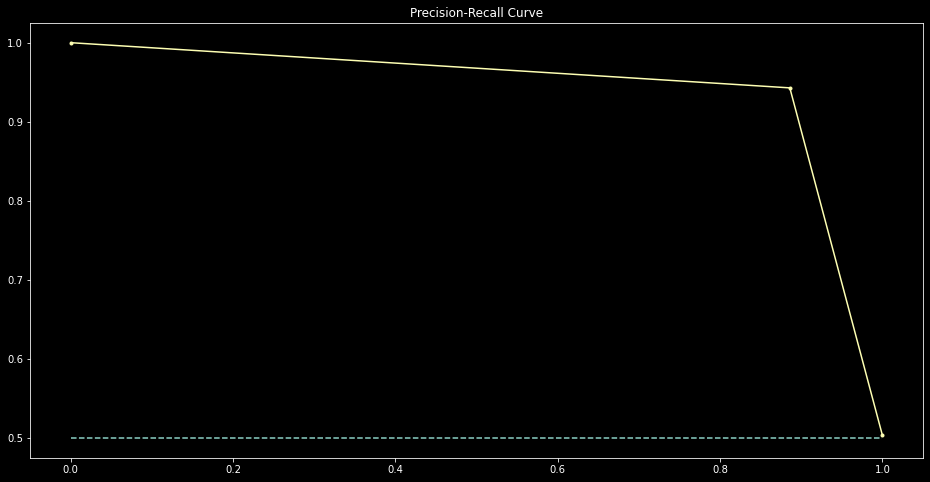

AUC: 0.943


In [24]:
plot_pre_recall(dectree_down, X_test_down,y_test_down)

### The Auc score shows us the success of the technique and model. Never forget this:
> ### <i>The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets</i>

## <span style="color:green">SMOTE TECHNIQUE </span>
Let's remember the SMOTE technique again:
#### SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

> ### SMOTE first selects a minority class instance a at random and finds its k nearest minority class neighbors. The synthetic instance is then created by choosing one of the k nearest neighbors b at random and connecting a and b to form a line segment in the feature space. The synthetic instances are generated as a convex combination of the two chosen instances a and b. 

Advantages:
* Mitigates the problem of overfitting caused by random oversampling as synthetic examples are generated rather than replication of instances
* No loss of useful information

Disadvantages:
* While generating synthetic examples SMOTE does not take into consideration neighboring examples from other classes. This can result in increase in overlapping of classes and can introduce additional noise
* SMOTE is not very effective for high dimensional data


### <span style="color:green">Application of SMOTE technique with Logistic Regression</span>

Using TensorFlow backend.


Accuracy score of Logistic Regression on SMOTE technique: 0.9796880220881768
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85149
           1       0.99      0.97      0.98     85440

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



{'accuracy': 0.9796880220881768,
 'precision': 0.9908623848816182,
 'recall': 0.968375468164794,
 'f1': 0.9794898810827449}

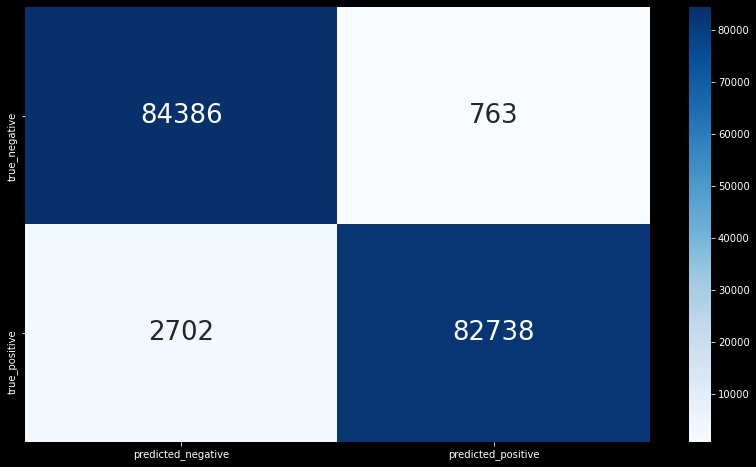

In [25]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', k_neighbors=6, random_state=42)
X_smt, y_smt = oversample.fit_resample(X, y)

X_train_smt,X_test_smt,y_train_smt,y_test_smt=train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)
X_train_smt=rbst.fit_transform(X_train_smt)
X_test_smt=rbst.transform(X_test_smt)

logreg_smote=LogisticRegression()
logreg_smote.fit(X_train_smt,y_train_smt)
logreg_smt_pred=logreg_smote.predict(X_test_smt)
print("Accuracy score of Logistic Regression on SMOTE technique:",accuracy_score(y_test_smt,logreg_smt_pred))
print(classification_report(y_test_smt,logreg_smt_pred))
conf_matrix(y_test_smt,logreg_smt_pred)

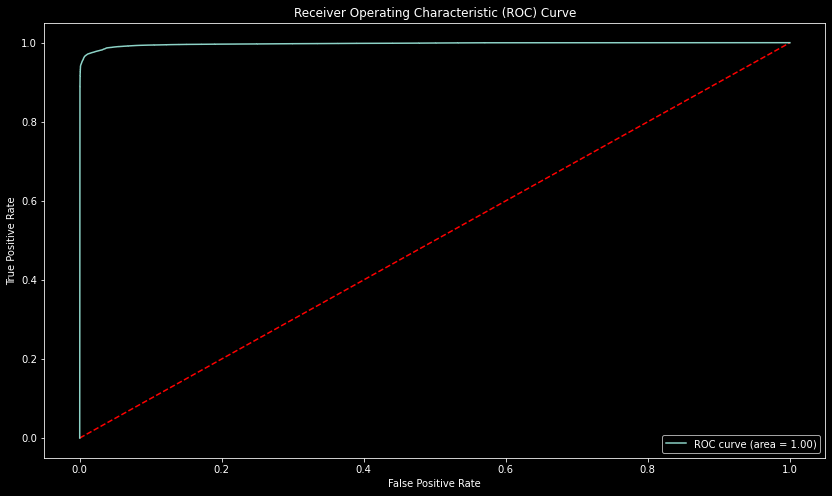

In [26]:
plot_roc_curve(logreg_smote,X_test_smt,y_test_smt)

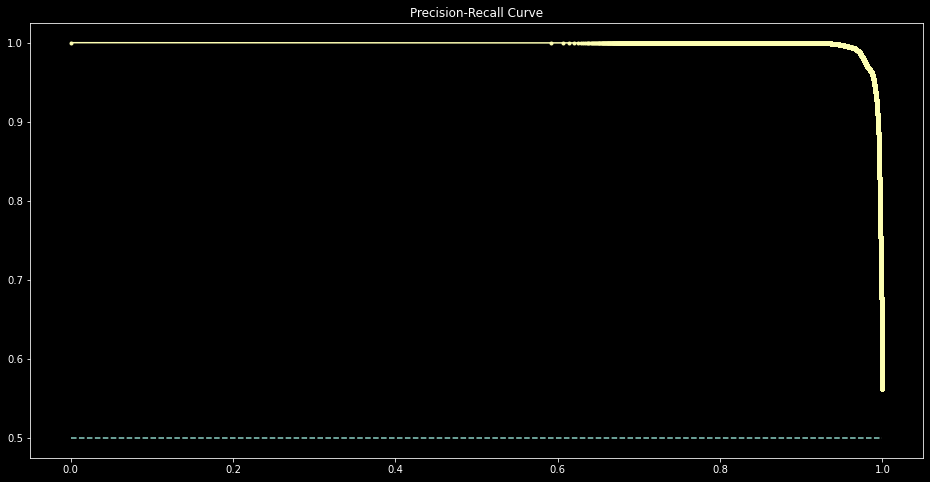

AUC: 0.998


In [27]:
plot_pre_recall(logreg_smote, X_test_smt,y_test_smt)

### <span style="color:green">Application of SMOTE technique with Decision Tree Classifier</span>

Accuracy score of Decision Tree Classifier on SMOTE technique: 0.9980420777424102
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

roc auc score of Decision Tree Classifier: 0.9980403320761848


{'accuracy': 0.9980420777424102,
 'precision': 0.997033195505408,
 'recall': 0.9990636704119851,
 'f1': 0.9980474002361828}

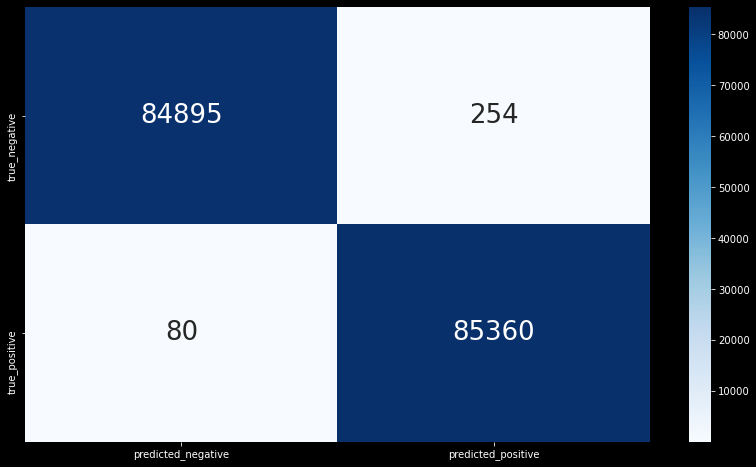

In [28]:
dectree_smote=DecisionTreeClassifier()
dectree_smote.fit(X_train_smt, y_train_smt)
dec_pred_sm=dectree_smote.predict(X_test_smt)
print("Accuracy score of Decision Tree Classifier on SMOTE technique:",accuracy_score(y_test_smt,dec_pred_sm))
print(classification_report(y_test_smt,dec_pred_sm))
print("roc auc score of Decision Tree Classifier:",roc_auc_score(y_test_smt,dec_pred_sm))
conf_matrix(y_test_smt,dec_pred_sm)


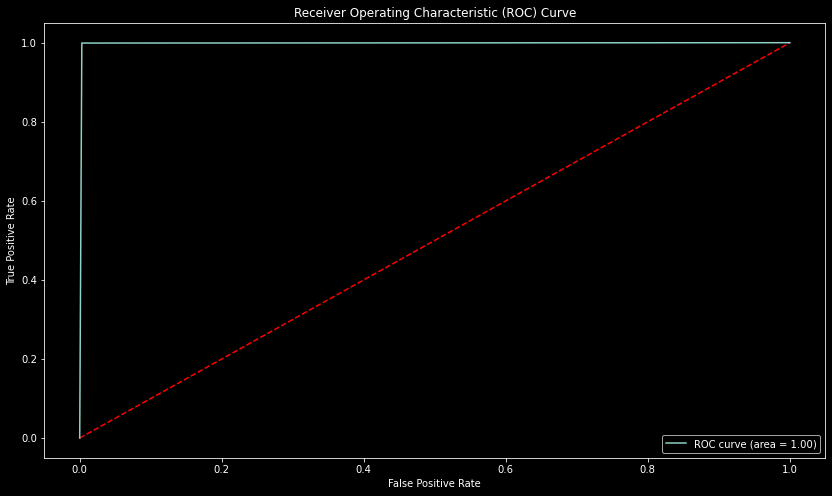

In [29]:
plot_roc_curve(dectree_smote,X_test_smt,y_test_smt)

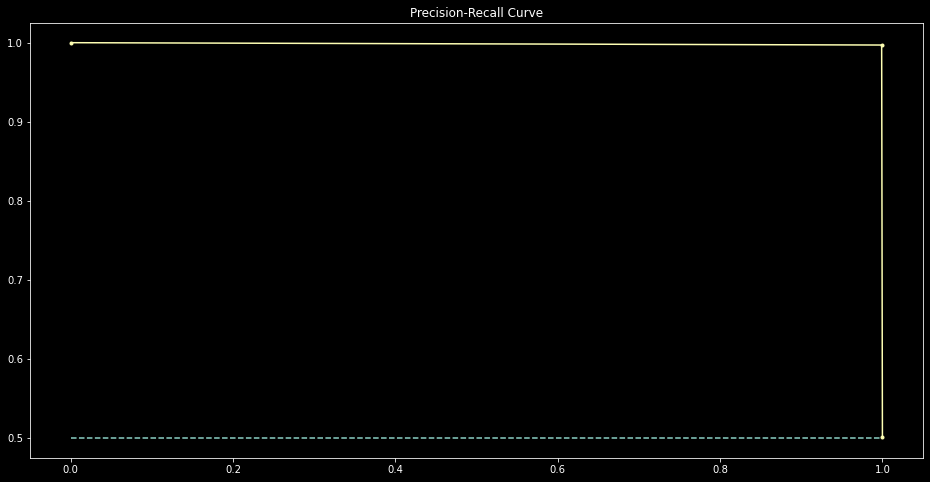

AUC: 0.998


In [30]:
plot_pre_recall(dectree_smote, X_test_smt,y_test_smt)

### We achieved the most successful scores ever with SMOTE technique. There are several options of the SMOTE technique. We explained the most commonly used technique here. If you want to see the others, I leave a link below.
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html

#### <span style="color:red">Important Note:</span> Our last tactic will be to use tree-based algorithms.I have already shown it above through the Decision Tree Classifier so that you can better understand this section above, but it is necessary to better understand its importance. Actually, I wanted to show you the performance of the Decision Tree Classifier step by step above. This is because modern applied machine learning algorithms (Random Forests, Gradient Boosted Tree etc ..) always outperform individual decision trees.


## Additional analysis: <span style="color:green">Analyze the imbalanced dataset using the Random Forests Classifier</span>

Accuracy score of Random Forest Classifier on Imbalanced Data: 0.999602073897218
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.96      0.91      0.93     85443
weighted avg       1.00      1.00      1.00     85443



{'accuracy': 0.999602073897218,
 'precision': 0.925,
 'recall': 0.8161764705882353,
 'f1': 0.8671875}

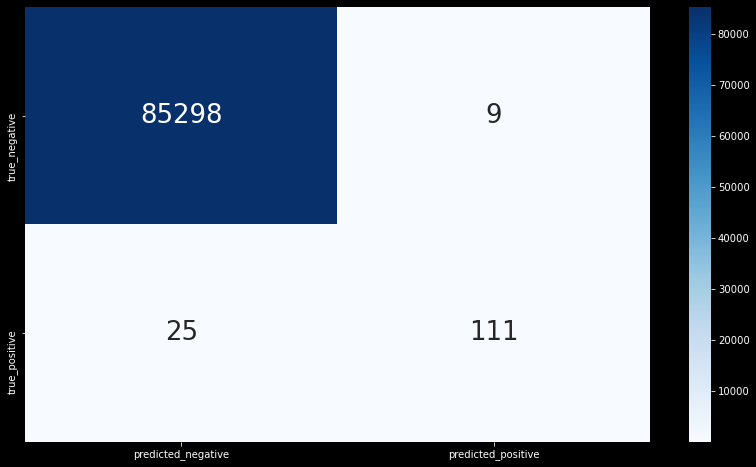

In [31]:
#Since we will use the existing unprocessed data set, we will use the first X_train_im, y_train_im, X_test_im, y_test_im sets we created.
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print("Accuracy score of Random Forest Classifier on Imbalanced Data:",accuracy_score(y_test,rf_pred))
print(classification_report(y_test,rf_pred))
conf_matrix(y_test,rf_pred)


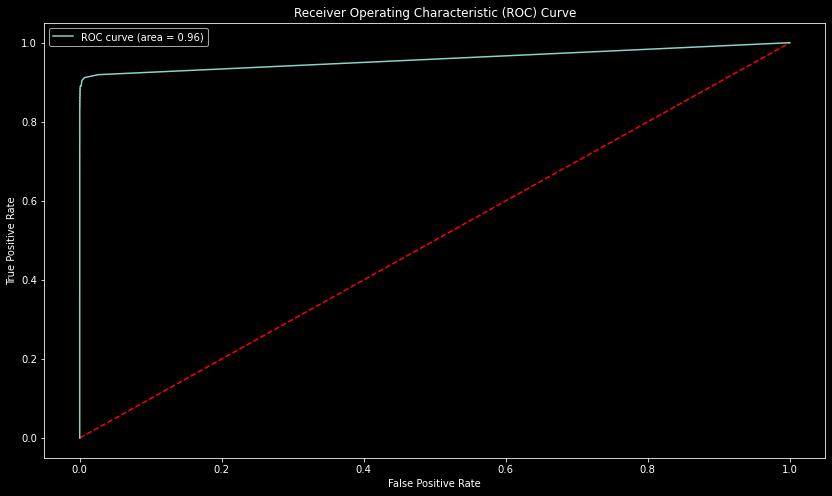

In [32]:
plot_roc_curve(rf,X_test,y_test)

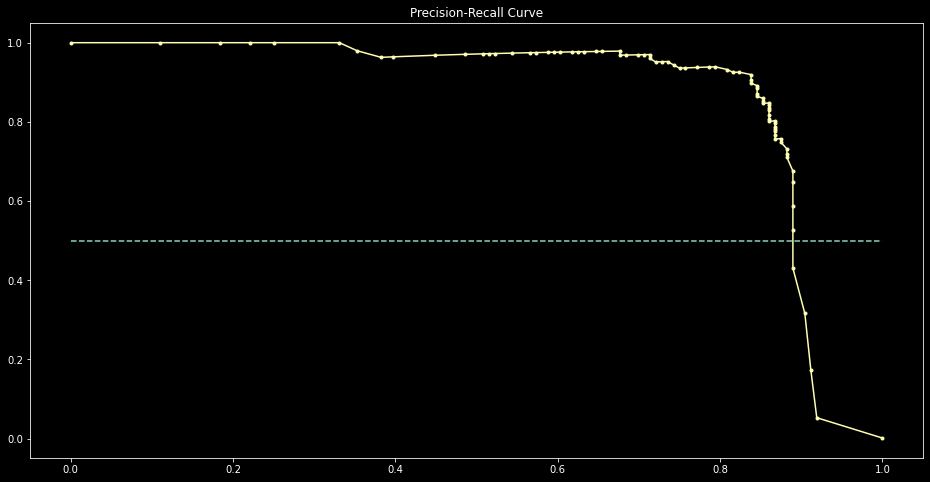

AUC: 0.872


In [33]:
plot_pre_recall(rf,X_test,y_test)

> ### The results of the RF algorithm are not bad without applying any technique. As we mentioned above, tree-based models can give successful results in such datasets. Never forget this alternative.

## <span style="color:green">Penalize Algorithms (Cost-Sensitive Training)</span>
#### The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.A popular algorithm for this technique is Penalized-XGB

## <span style="color:green">XGBoost for Imbalanced Classification</span>
#### The stochastic gradient boosting algorithm, also called gradient boosting machines or tree boosting, is a powerful machine learning technique that performs well or even best on a wide range of challenging machine learning problems.XGBoost provides a highly efficient implementation of the stochastic gradient boosting algorithm and access to a suite of model hyperparameters designed to provide control over the model training process. XGBoost is an effective machine learning model, even on datasets where the class distribution is skewed.Before any modification or tuning is made to the XGBoost algorithm for imbalanced classification, it is important to test the default XGBoost model and establish a baseline in performance.
> ### The implementation provides a hyperparameter designed to tune the behavior of the algorithm for imbalanced classification problems; this is the <span style="color:blue">scale_pos_weight</span> hyperparameter.A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution. For example, for a dataset with a 1 to 100 ratio for examples in the minority to majority classes, the scale_pos_weight can be set to 100. This will give classification errors made by the model on the minority class (positive class) 100 times more impact, and in turn, 100 times more correction than errors made on the majority class.The XGBoost documentation suggests a fast way to estimate this value using the training dataset as the total number of examples in the majority class divided by the total number of examples in the minority class.
https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

Accuracy score of XGB on Imbalanced Data: 0.9996137776061234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.91      0.85      0.87       136

    accuracy                           1.00     85443
   macro avg       0.95      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



{'accuracy': 0.9996137776061234,
 'precision': 0.905511811023622,
 'recall': 0.8455882352941176,
 'f1': 0.8745247148288974}

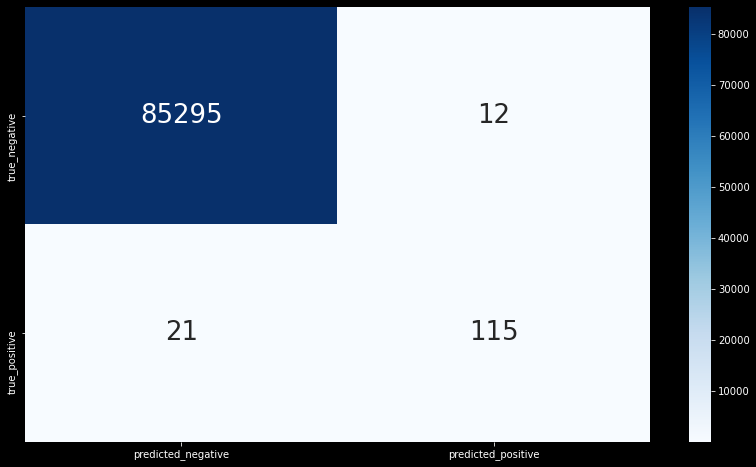

In [34]:
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=578) # SumofMajority/SumofMinority
xgb.fit(X_train, y_train)
xgb_pred=xgb.predict(X_test)
print("Accuracy score of XGB on Imbalanced Data:",accuracy_score(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))
conf_matrix(y_test,xgb_pred)

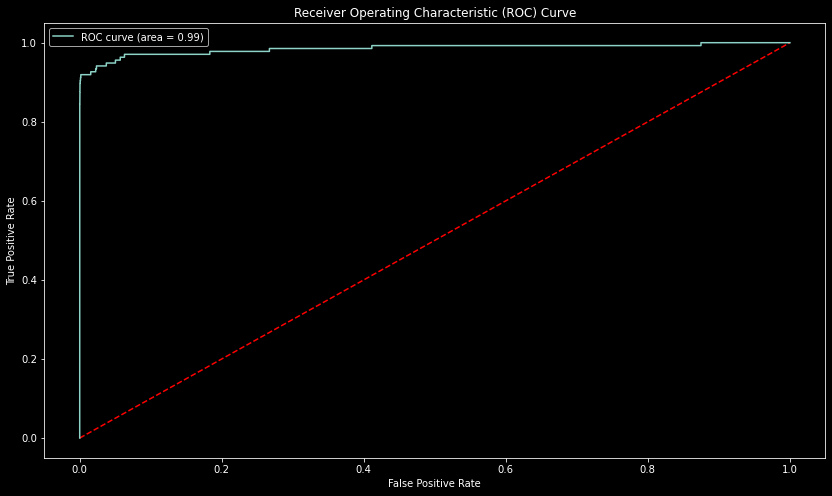

In [35]:
plot_roc_curve(xgb,X_test,y_test)

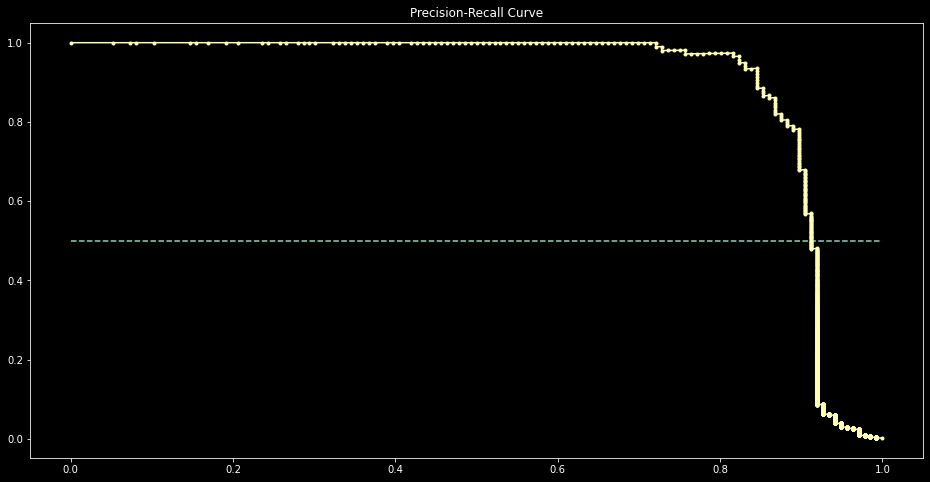

AUC: 0.900


In [36]:
plot_pre_recall(xgb,X_test,y_test)

# <center> <span style="color:green"> CONCLUSION </span> </center>

# <span style="color:orange"> I tried to show how we can work with unbalanced datasets using the 4 most popular methods. If you found it successful, please do not withhold your support. If there is an error or missing place, please feel free to appear. Thanks for coming here ...</span>